In [2]:
import numpy as np
import random

In [3]:
import tsplib95

In [4]:
with open('dj38.tsp') as f:
    problem = tsplib95.read(f)

In [5]:
problem.get_weight(2,2)

0

In [6]:
help(problem.get_weight)

Help on method get_weight in module tsplib95.models:

get_weight(start, end) method of tsplib95.models.StandardProblem instance
    Return the weight of the edge between start and end.

    This method provides a single way to obtain edge weights regardless of
    whether the problem uses an explicit matrix or a distance function.

    :param int start: starting node index
    :param int end: ending node index
    :return: weight of the edge between start and end
    :rtype: float



In [7]:
import random
def randomSolution(N): #number of row is number of population
    random_solution = random.sample(range(1,N+1), N)
    return random_solution

In [8]:
tst_sol = randomSolution(32)

In [9]:
np.argmax(tst_sol)

np.int64(20)

In [10]:
tst_sol[0]

7

In [11]:
def calcular_costo(solucion):
    totalCost = 0
    for i in range(len(solucion)):
        from_city = solucion[i] 
        to_city = None
        if i+1 < len(solucion):
            to_city = solucion[i+1]
        else:
            to_city = solucion[0]
        
        totalCost += problem.get_weight(from_city, to_city)
    
    return totalCost

In [12]:
import copy

In [13]:
def neighbors(solucion):
    N = len(solucion)
    lst_choices = [i for i in range(N)]
    idx1 = random.choice(lst_choices)
    lst_choices.remove(idx1)
    idx2 = random.choice(lst_choices)

    vecino = copy.deepcopy(solucion)
    vecino[idx1] = solucion[idx2]
    vecino[idx2] = solucion[idx1]
    return vecino, solucion[idx2],solucion[idx1]

In [18]:
def tabu_search(max_iterations,permanencia,tamaño_vecindad,n ):
    
    sol_inicial = randomSolution(n)

    sol_actual = sol_inicial
    costo_actual = calcular_costo(sol_actual)
    scores = []
    solutions = []
    scores.append(costo_actual)
    solutions.append(sol_actual)
    
    tabu_list = {}
    k = 0
    
    while k <= max_iterations:
        #generar vecindad
        vecinos = []
        costos = []
        tuplas = []
        best_historical_score_so_far = scores[np.argmin(scores)]
        
        while len(vecinos)<tamaño_vecindad:
            sol,val1, val2 = neighbors(sol_actual)
            if sol not in vecinos: # todos son distintos
                costo = calcular_costo(sol_actual) # evaluar vecinos.
                vecinos.append(sol)
                costos.append(costo)
                tuplas.append((val1, val2))
                
        ## obtener el menor costo de la lista
        min_costo = np.argmin(np.array(costos))
        best_neighbor = vecinos[min_costo]
        ## criterios
 
        if (tuplas[min_costo] not in (tabu_list.keys())):
           sol_actual = best_neighbor
           costo_actual = costos[min_costo]
           scores.append(costo_actual)
           solutions.append(sol_actual)
        elif ((tuplas[min_costo] in (tabu_list.keys())) and (min_costo < best_historical_score_so_far)):
            sol_actual = best_neighbor
            costo_actual = costos[min_costo]
            scores.append(costo_actual)
            solutions.append(sol_actual)
            
        for tabu_element in tabu_list.copy().keys():
            tabu_list[tabu_element] = tabu_list[tabu_element] - 1 
            if tabu_list[tabu_element] == 0:
                tabu_list.pop(tabu_element)

        tabu_list[tuplas[min_costo]] = permanencia
        
        k += 1


    return solutions,scores

In [19]:
#Optimal Value:  6656

In [33]:
iteraciones = 2500
permanencia = 4
tamaño_vecindad = 350

In [34]:
sol_lst, scores_lst = tabu_search(iteraciones, permanencia ,tamaño_vecindad,38 )
print('Mejor Solución:',sol_lst[np.argmin(scores_lst)])
print('Costo de la Mejor Solución:',scores_lst[np.argmin(scores_lst)])

Mejor Solución: [20, 25, 4, 23, 24, 16, 14, 37, 30, 32, 11, 6, 28, 26, 21, 9, 34, 7, 5, 1, 2, 3, 31, 36, 33, 38, 22, 19, 12, 13, 15, 10, 17, 27, 18, 29, 35, 8]
Costo de la Mejor Solución: 22075


In [30]:
import matplotlib.pyplot as plt

def plot_route(best_solution):
    xs = [problem.node_coords[i][0] for i in best_solution]
    ys = [problem.node_coords[i][1] for i in best_solution]
    plt.clf()
    # 'bo-' means blue color, round points, solid lines
    plt.plot(xs,ys,'y--')
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.show()

In [31]:
bst_all = sol_lst[np.argmin(scores_lst)]

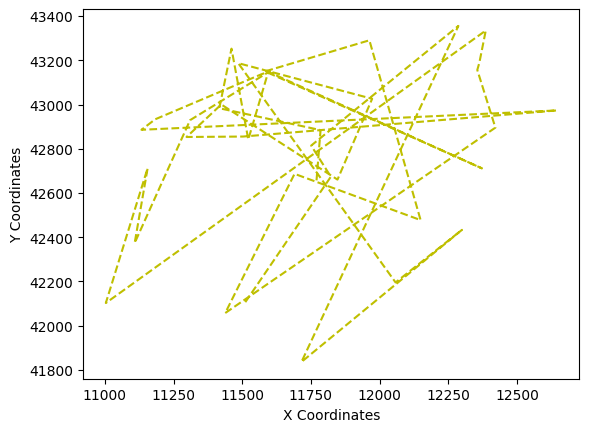

In [32]:
plot_route(bst_all)